In [1]:
!apt-get install poppler-utils
!pip install pdf2image
!pip install easyocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [2]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw

In [3]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [4]:
from google.colab import files
files.upload()

Saving sample1.pdf to sample1 (1).pdf


{'sample1.pdf': b'%PDF-1.4\r\n%\xe2\xe3\xcf\xd3\r\n1 0 obj\r\n<<\r\n/Type /Page\r\n/CropBox [ 0 0 595.32 841.92 ]\r\n/MediaBox [ 0 0 595.32 841.92 ]\r\n/Rotate 360\r\n/Resources << /Font << /F1 2 0 R /F2 3 0 R /F3 4 0 R >> >>\r\n/Contents 5 0 R\r\n/Parent 6 0 R\r\n>>\r\nendobj\r\n2 0 obj\r\n<<\r\n/BaseFont /CIDFont+F1\r\n/DescendantFonts [ << /BaseFont /CIDFont+F1 /CIDSystemInfo << /Ordering\r\n7 0 R /Registry 8 0 R /Supplement 0 >> /CIDToGIDMap /Identity\r\n/FontDescriptor << /Ascent 891 /CapHeight 662 /Descent -216 /Flags 6\r\n/FontBBox 9 0 R /FontFile2 10 0 R /FontName /CIDFont+F1 /ItalicAngle 0\r\n/StemV 11 0 R /Type /FontDescriptor >> /Subtype /CIDFontType2 /Type /Font /W\r\n12 0 R >> ]\r\n/Encoding /Identity-H\r\n/Subtype /Type0\r\n/ToUnicode 13 0 R\r\n/Type /Font\r\n>>\r\nendobj\r\n7 0 obj\r\n(Identity)\r\nendobj\r\n8 0 obj\r\n(Adobe)\r\nendobj\r\n9 0 obj\r\n[ -943 -216 943 891 ]\r\nendobj\r\n10 0 obj\r\n<<\r\n/Filter /FlateDecode\r\n/Length 100909\r\n/Length1 387404\r\n/Type /S

In [5]:
images = convert_from_path('sample1.pdf')

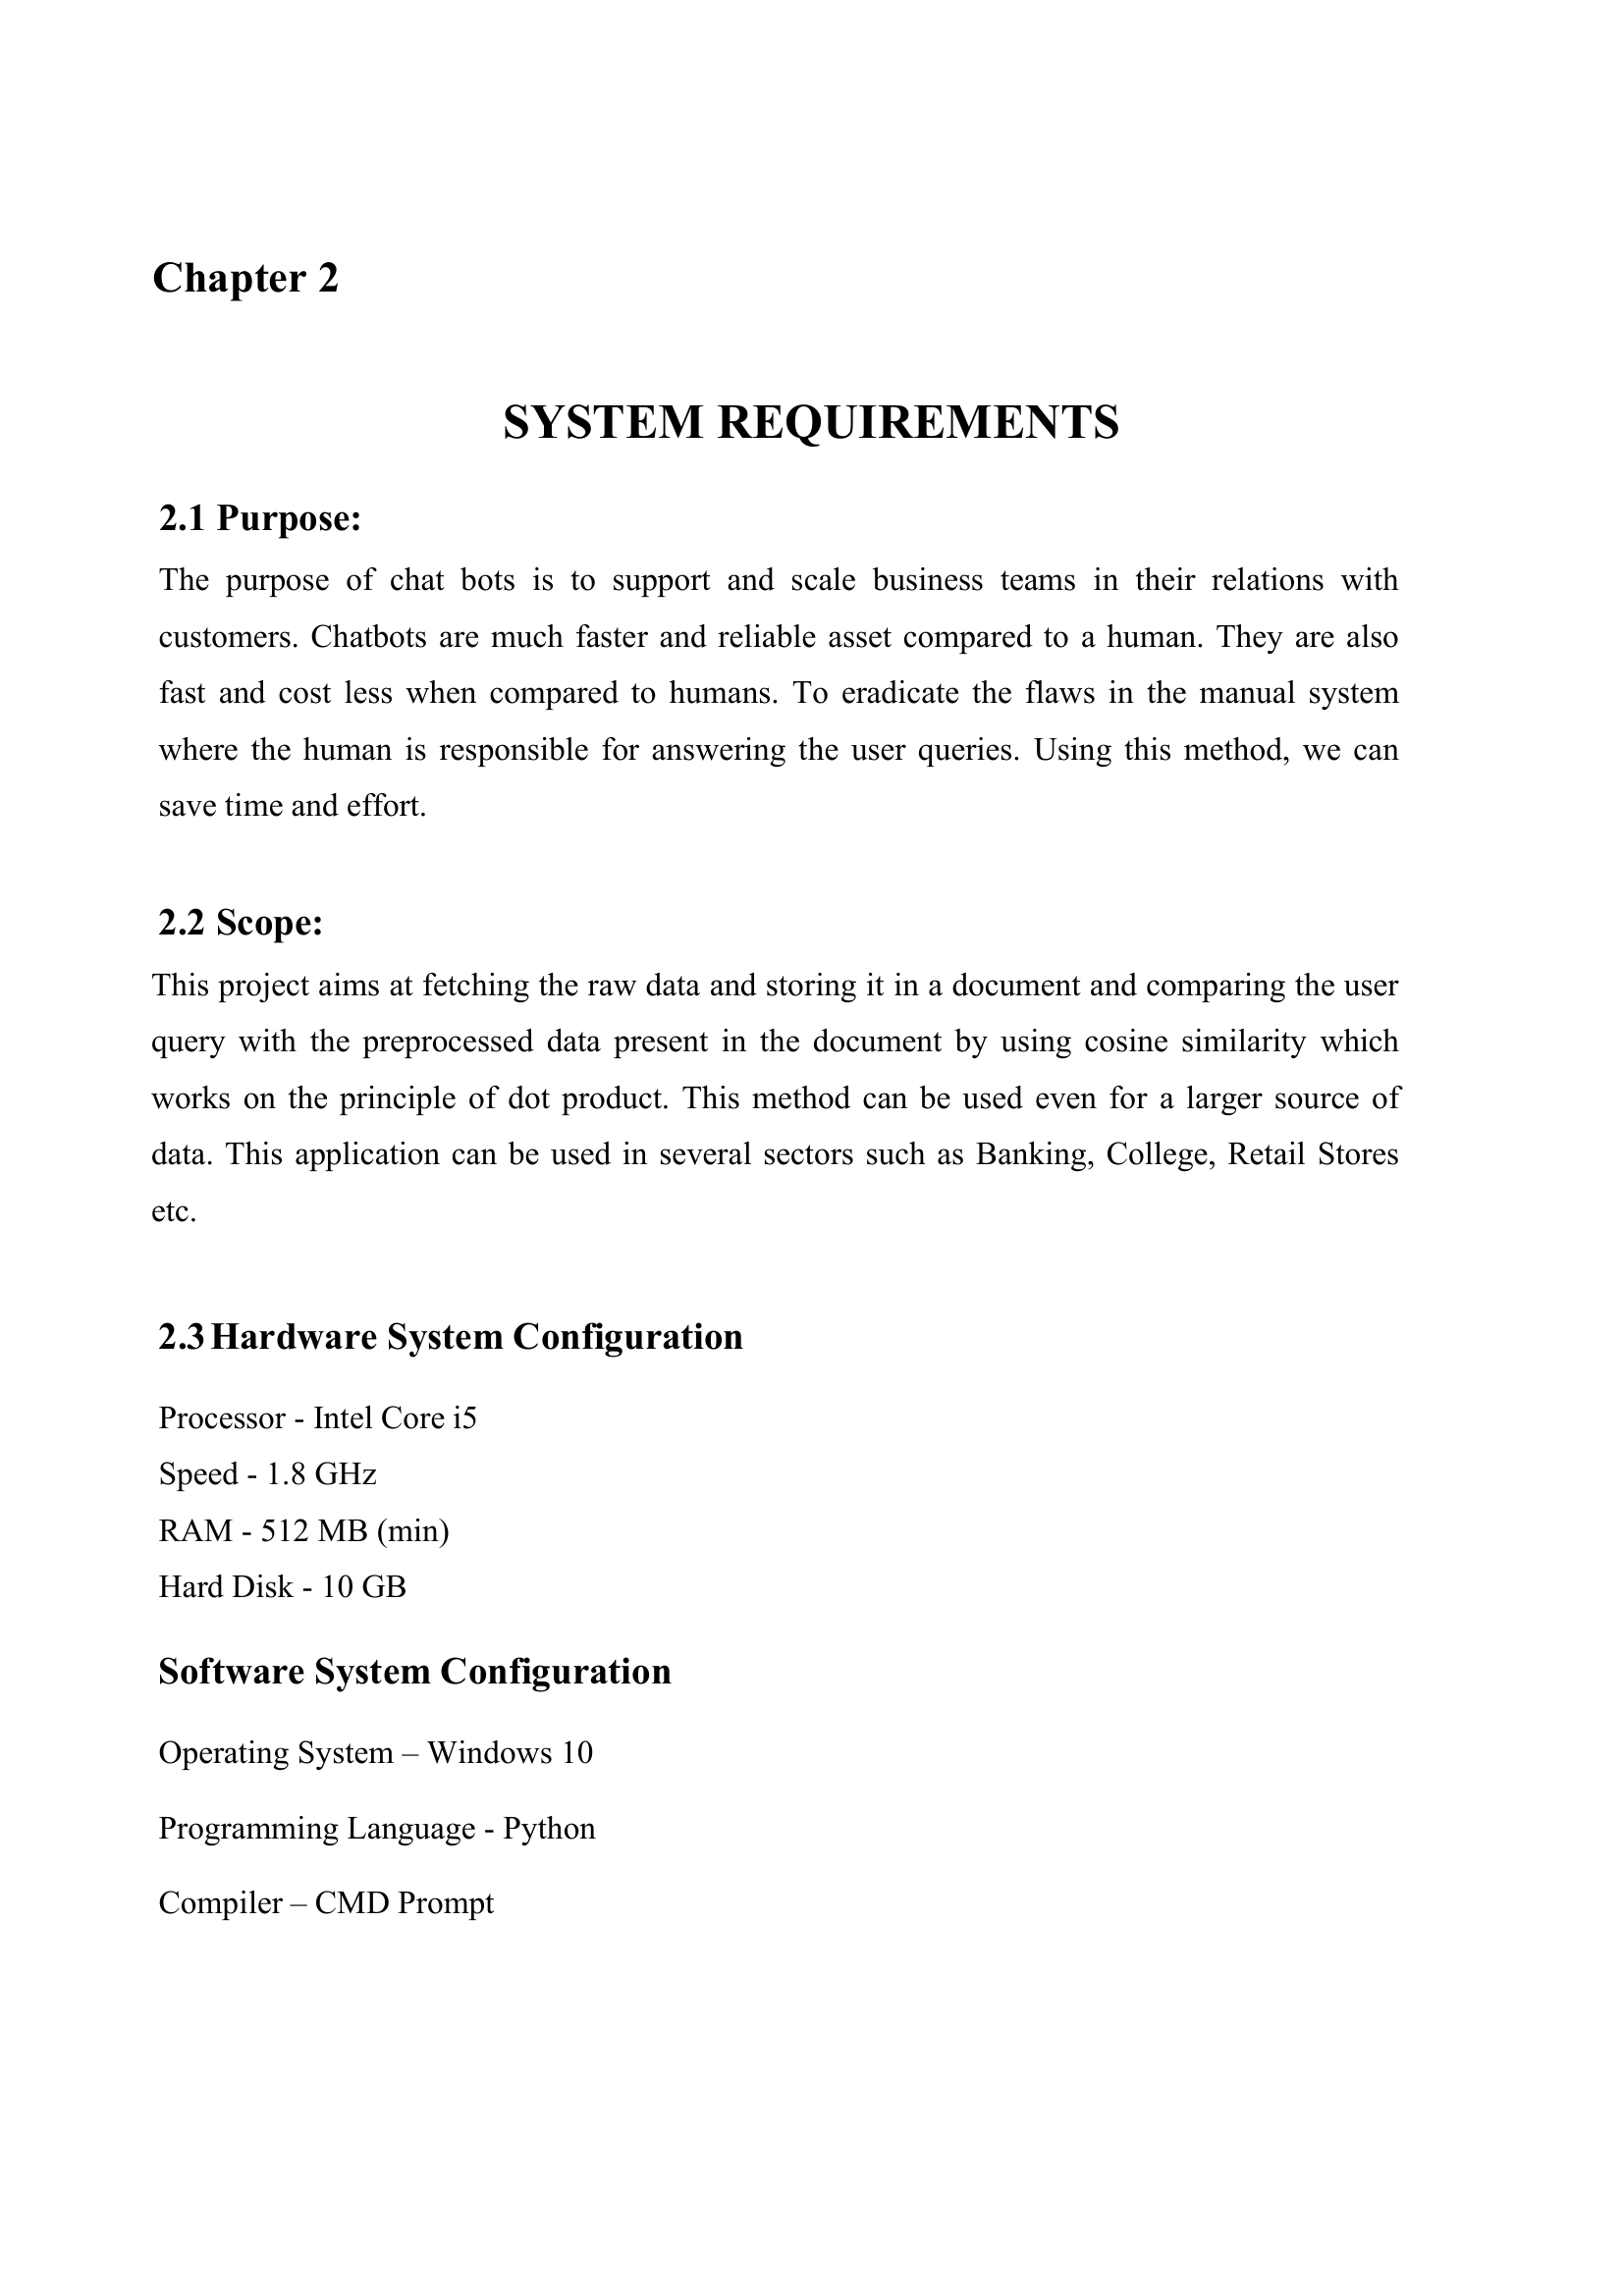

In [6]:
from IPython.display import display, Image
display(images[0])

In [7]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[149, 259], [348, 259], [348, 315], [149, 315]],
  'Chapter 2',
  0.9999688463963594),
 ([[507, 400], [1147, 400], [1147, 462], [507, 462]],
  'SYSTEM REQUIREMENTS',
  0.6934226501226161),
 ([[158, 507], [375, 507], [375, 560], [158, 560]],
  '2.1 Purpose:',
  0.9994748865730921),
 ([[159, 572], [1430, 572], [1430, 616], [159, 616]],
  'The   purpose of chat bots is to support and scale business teams in their relations with',
  0.46002672643876114),
 ([[158, 627], [1430, 627], [1430, 677], [158, 677]],
  'customers. Chatbots are much faster and reliable asset compared to a human. They are also',
  0.7347881546352671),
 ([[158, 684], [1432, 684], [1432, 732], [158, 732]],
  'fast and cost less when compared to humans To eradicate the flaws in the manual system',
  0.6691067388778132),
 ([[159, 744], [1427, 744], [1427, 789], [159, 789]],
  'where the human is responsible for answering the user queries Using this method, we can',
  0.8529030163068361),
 ([[157, 802], [439, 802], [439

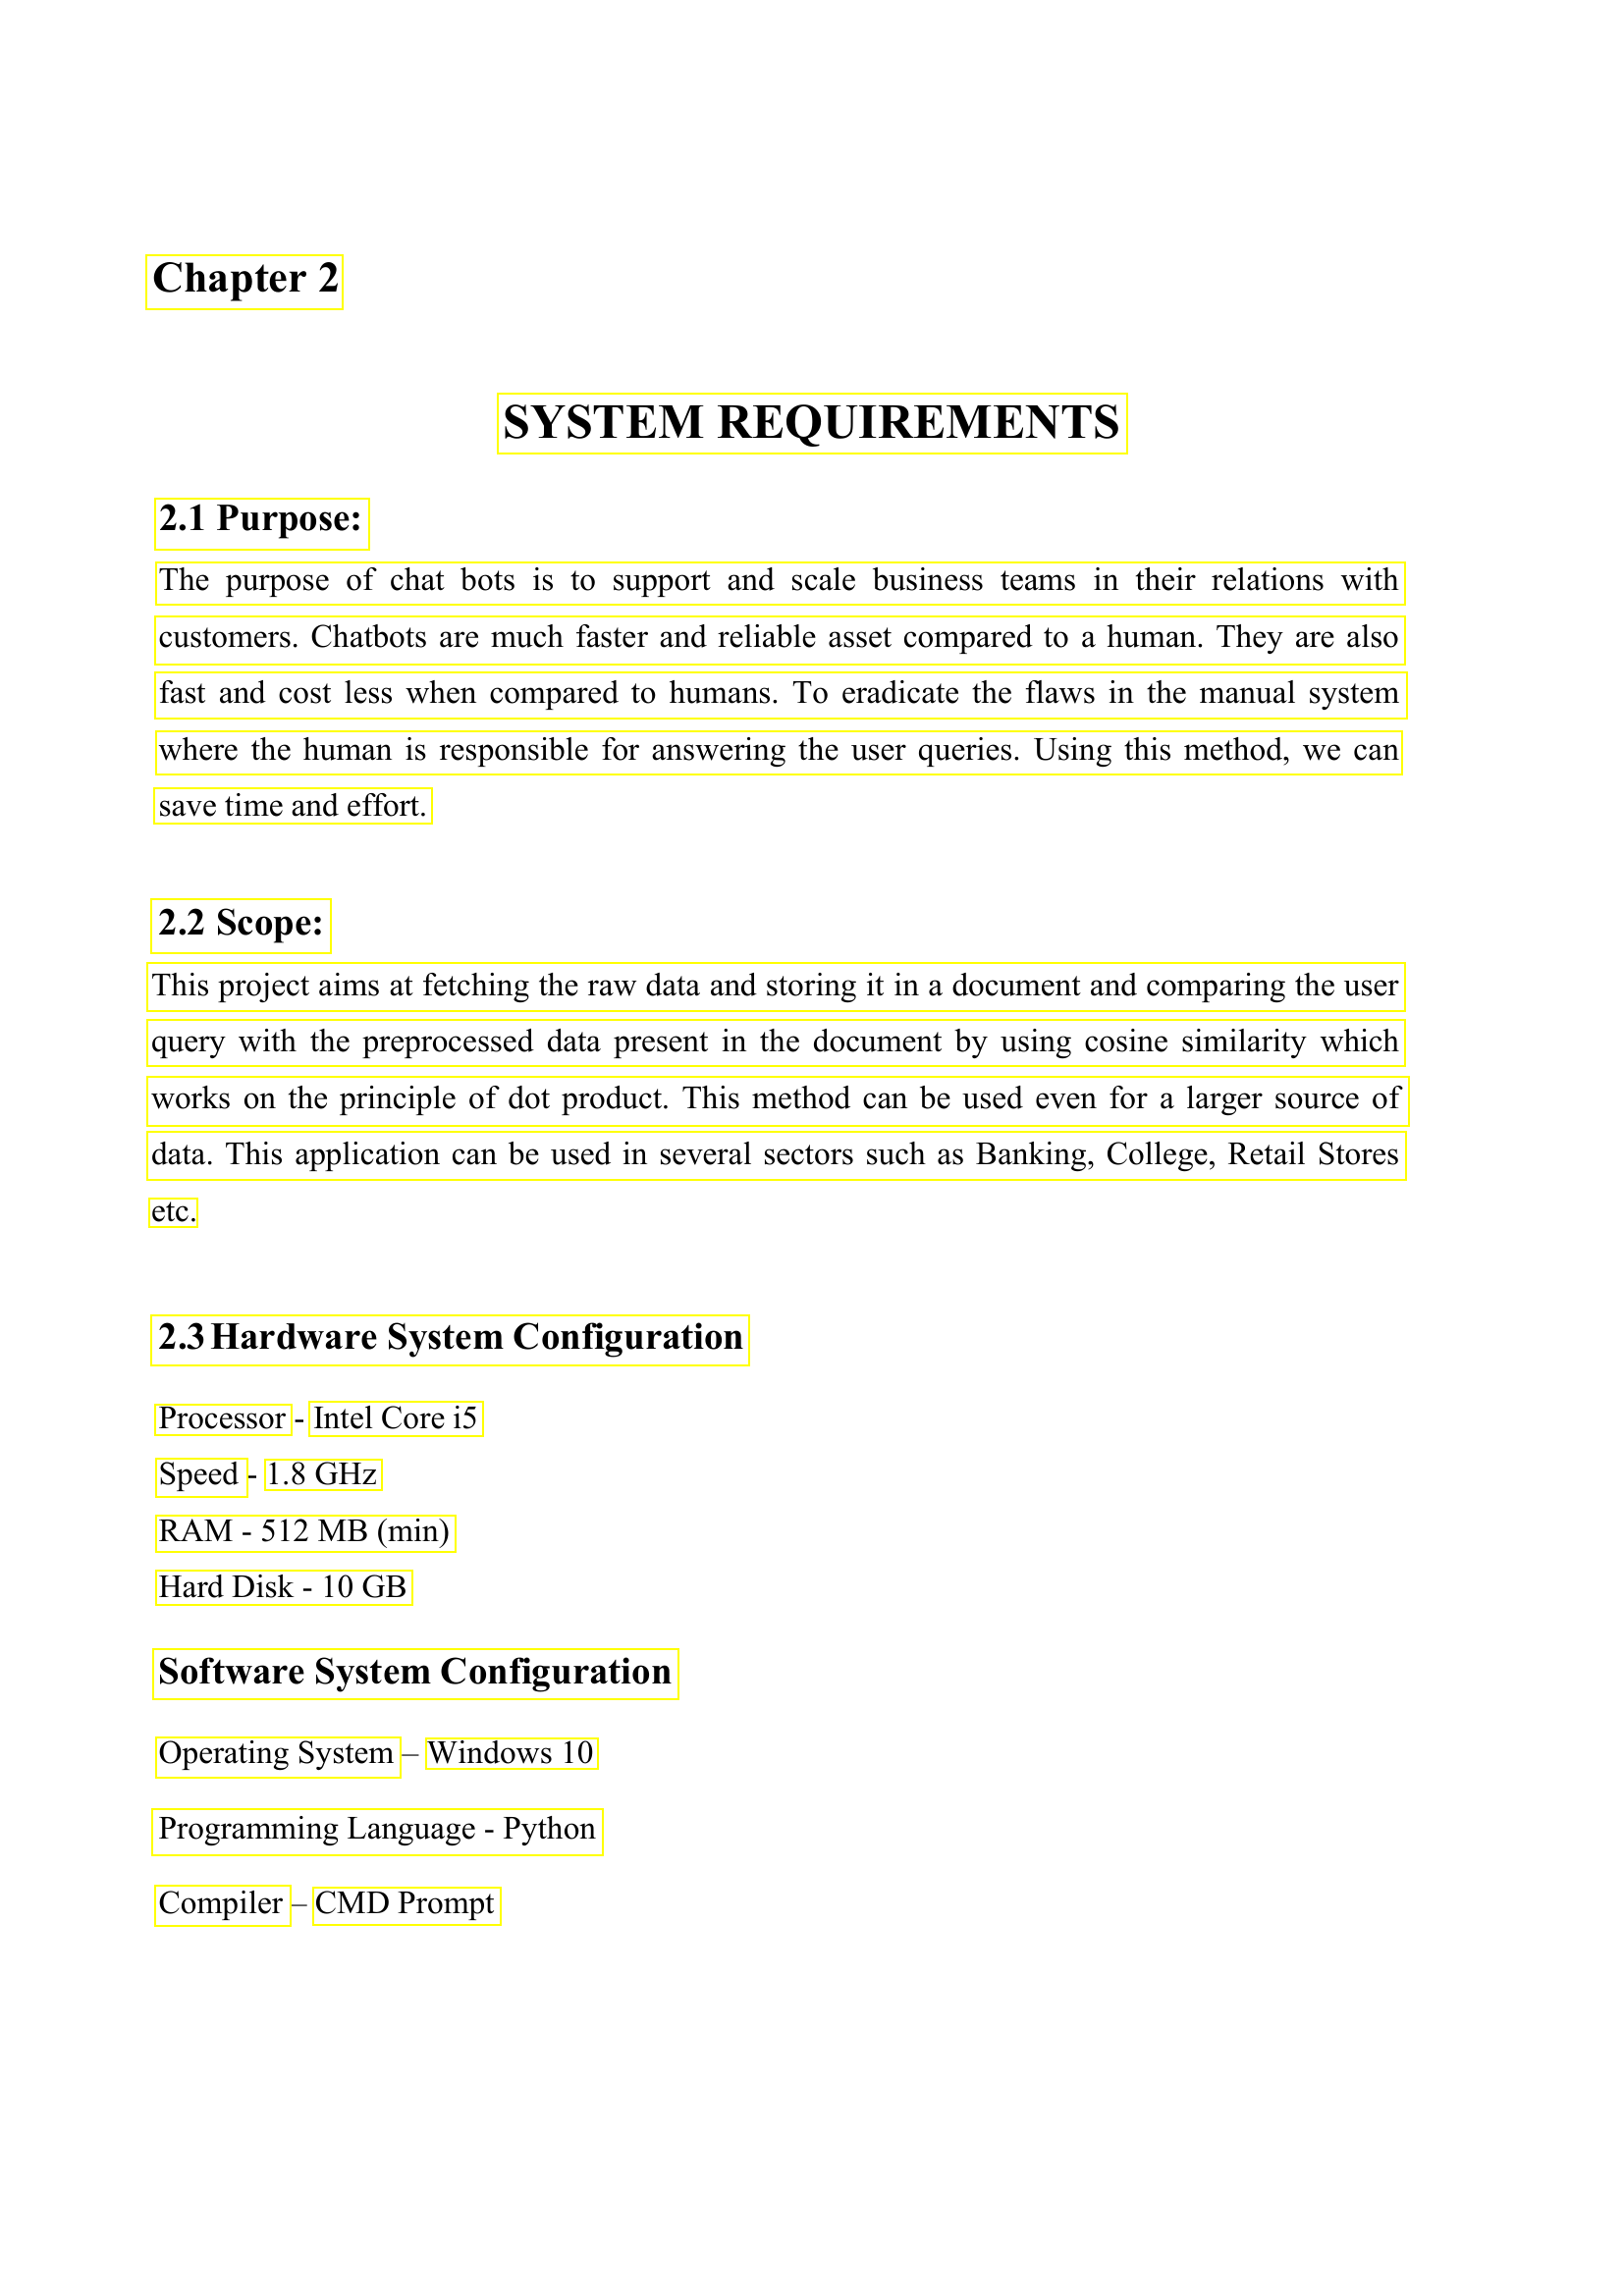

In [8]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(images[0], bounds)

In [9]:
bounds[1][1]

'SYSTEM REQUIREMENTS'

In [10]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

print(text)

Chapter 2
SYSTEM REQUIREMENTS
2.1 Purpose:
The   purpose of chat bots is to support and scale business teams in their relations with
customers. Chatbots are much faster and reliable asset compared to a human. They are also
fast and cost less when compared to humans To eradicate the flaws in the manual system
where the human is responsible for answering the user queries Using this method, we can
save time and effort.
2.2 Scope:
This project aims at fetching the raw data and storing it in a document and comparing the user
query with the preprocessed data present in the document by using cosine similarity which
works on the principle of dot product  This method can be used even for a larger source of
data. This application can be used in several sectors such as Banking, College, Retail Stores
etc.
2.3 Hardware System Configuration
Processor
Intel Core i5
Speed
1.8 GHz
RAM - 512 MB (min)
Hard Disk - 10 GB
Software System Configuration
Operating System
Windows 10
Programming Language - Pyth